In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
plt.rcParams.update({
    "font.size": 15,
    "font.family": "Arial"
})
bxwidth = 1

In [2]:
df = pd.read_csv("D:/pml/Iris.csv")
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
print(df.describe())
print(df.info())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    

In [4]:
print(df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [5]:
cols = df.columns
print(cols)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [6]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
print(numeric_cols)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')


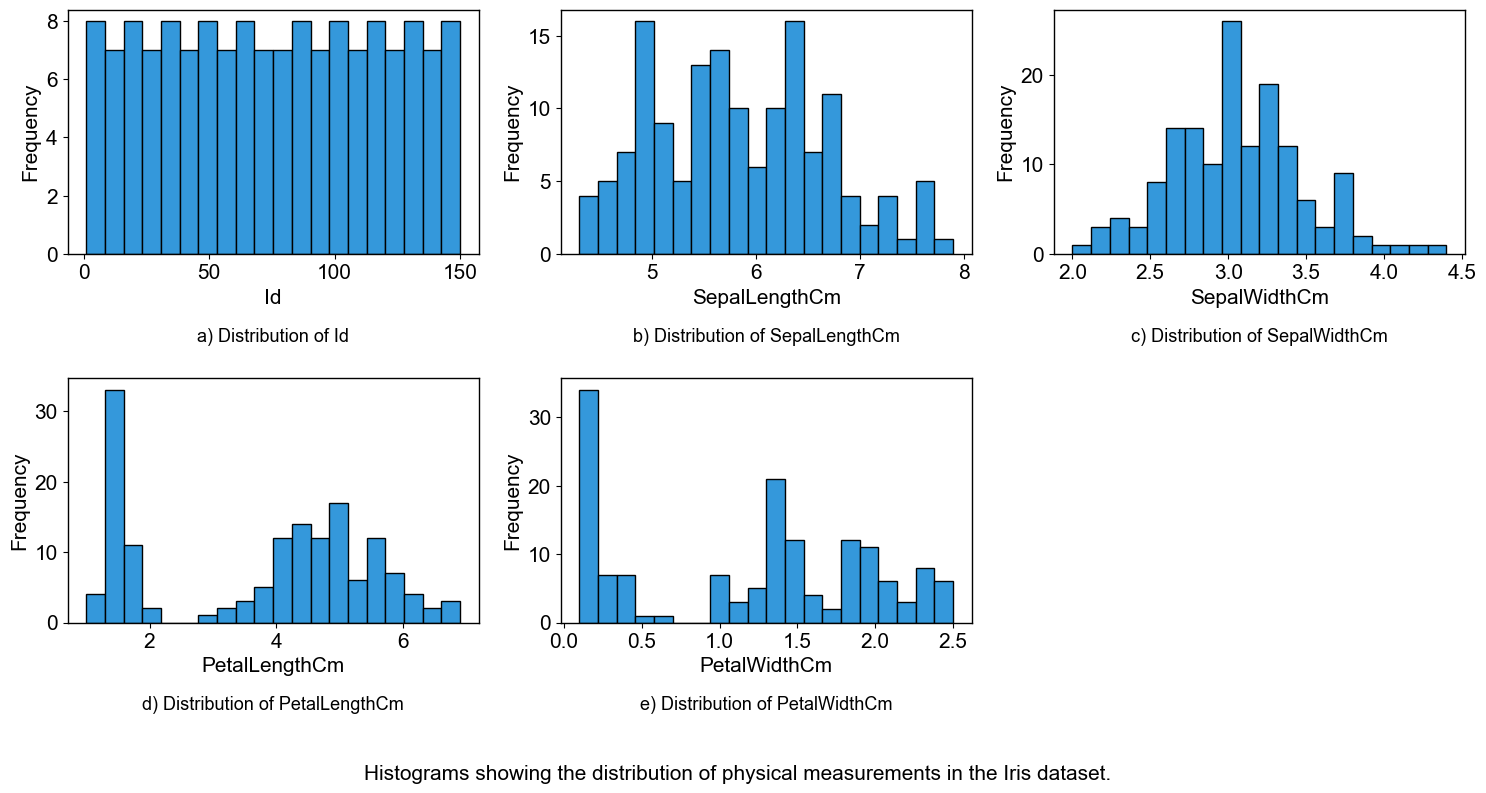

In [7]:
numeric_df = df.select_dtypes(include=["int64", "float64"])
cols = numeric_df.columns
rows = math.ceil(len(cols) / 3)

fig, axes = plt.subplots(rows, 3, figsize=(15, 4 * rows))
axes = axes.flatten()
subplot_labels = [f"{chr(97+i)})" for i in range(len(cols))]

for i, col in enumerate(cols):
    ax = axes[i]
    ax.hist(numeric_df[col].dropna(), bins=20, edgecolor="black", color="#3498db")
    
    ax.set_title("") 
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    
    ax.text(
        0.5, -0.30,
        f"{subplot_labels[i]} Distribution of {col}",
        ha="center",
        va="top",
        transform=ax.transAxes,
        fontsize=13
    )

    for spine in ax.spines.values():
        spine.set_linewidth(bxwidth)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.text(
    0.5, 0.01,
    "Histograms showing the distribution of physical measurements in the Iris dataset.",
    ha="center",
    fontsize=15
)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig("histogram_iris_features.eps", format="eps", dpi=600, bbox_inches="tight")
plt.show()

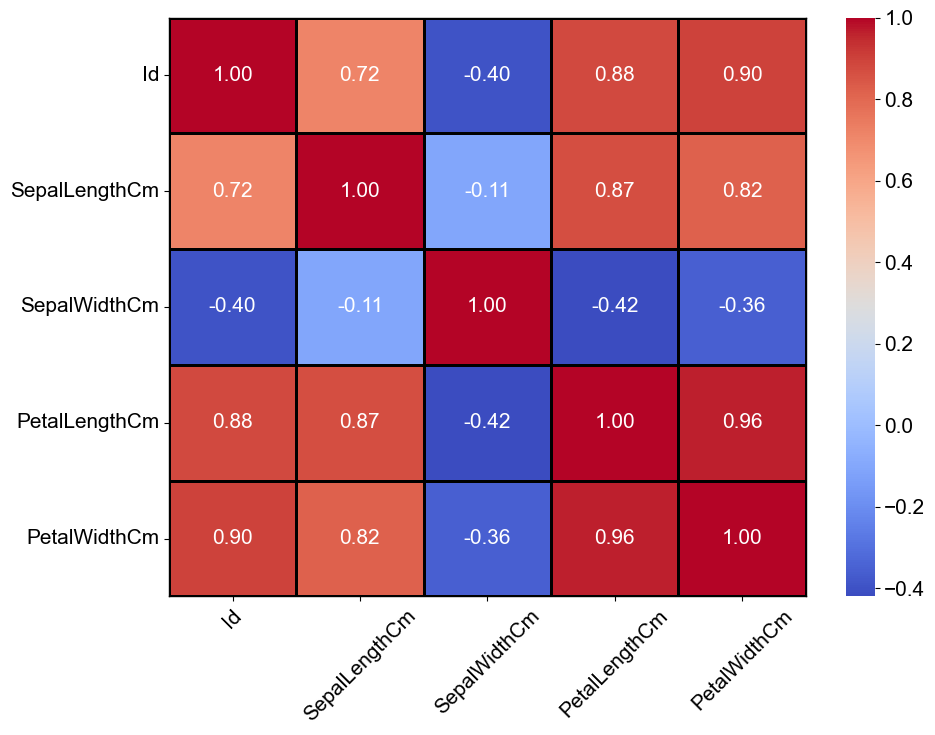

In [8]:
plt.figure(figsize=(10, 8))
corr_matrix = numeric_df.corr()

ax = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1, linecolor='black')

for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(bxwidth)

plt.title("") 
plt.xticks(rotation=45)

fig.text(
    0.5, 0.01, 
    "Correlation Heatmap of Iris numeric features.", 
    ha="center", fontsize=15
)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig("correlation_iris_matrix.eps", format="eps", dpi=600, bbox_inches="tight")
plt.show()

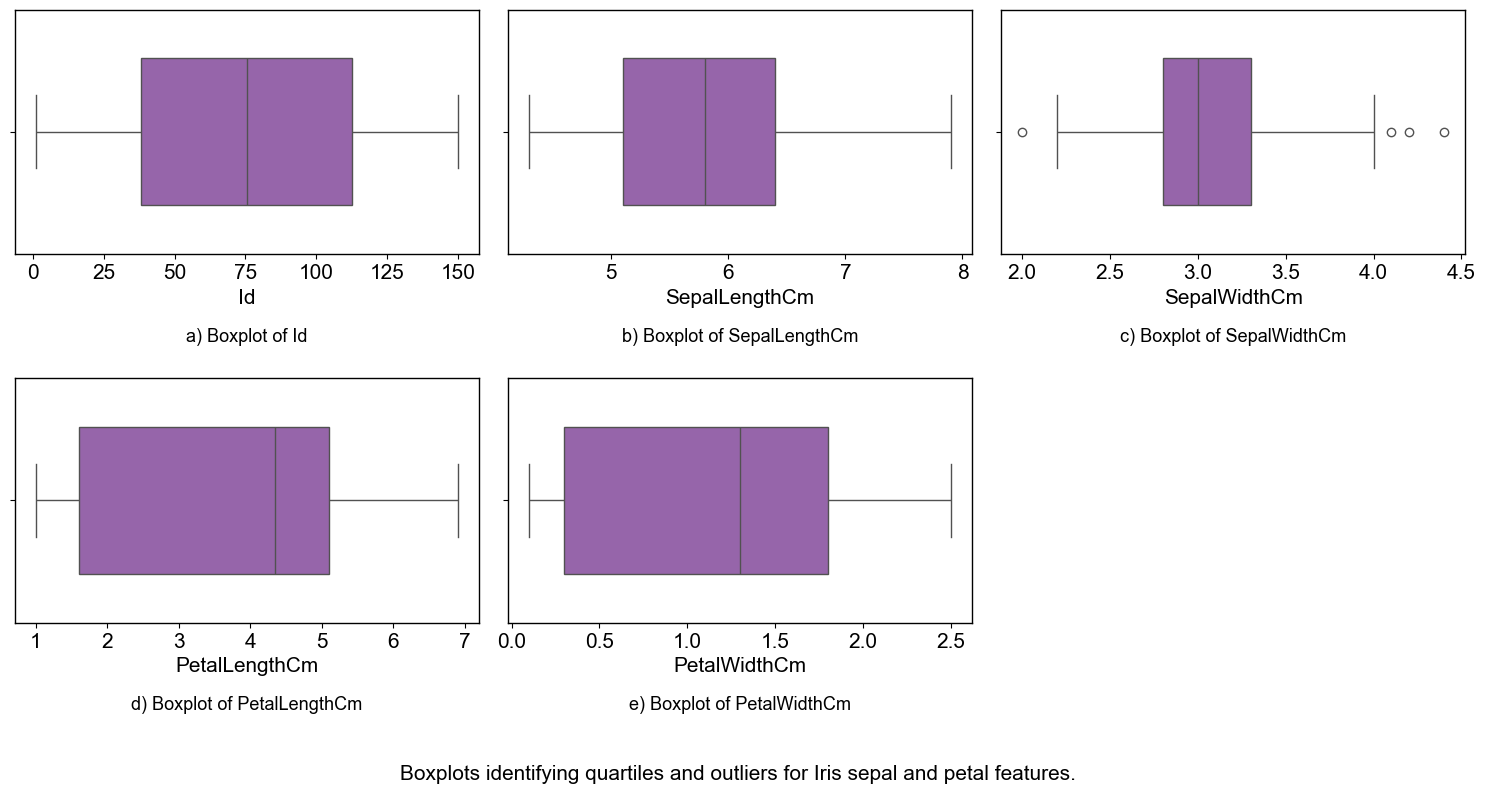

In [9]:
fig, axes = plt.subplots(rows, 3, figsize=(15, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(cols):
    ax = axes[i]
    sns.boxplot(x=numeric_df[col], ax=ax, color="#9b59b6", width=0.6)
    
    ax.set_title("")
    ax.set_xlabel(col)
    
    ax.text(
        0.5, -0.30, 
        f"{subplot_labels[i]} Boxplot of {col}", 
        ha="center", va="top", transform=ax.transAxes, fontsize=13
    )

    for spine in ax.spines.values():
        spine.set_linewidth(bxwidth)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.text(
    0.5, 0.01, 
    "Boxplots identifying quartiles and outliers for Iris sepal and petal features.", 
    ha="center", fontsize=15
)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig("boxplot_iris_features.eps", format="eps", dpi=600, bbox_inches="tight")
plt.show()